In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# считываем файлы
train = pd.read_csv('train.csv.zip')
test = pd.read_csv('test.csv.zip')
f_test = pd.read_csv('formula_test.csv.zip')
f_train = pd.read_csv('formula_train.csv.zip')

cor_value = 0.12
test_size = 0.2

In [5]:
# удаляем дублирующий столбец
del f_train['critical_temp']

# соединяем признаки в один фрэйм
df_train = pd.concat([train, f_train], axis=1)
df_test = pd.concat([test, f_test], axis=1)

In [ ]:
df_train.tail()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
17005,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Tm0.84Lu0.16Fe3Si5
17006,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,Tl1Ba2Ca3Cu4O11
17007,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Nb0.8Pd0.2
17008,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Nb0.69Pd0.31
17009,3,87.468333,86.858500,82.555758,80.458722,1.041270,0.895229,71.75500,43.144000,29.905282,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Fe1Se0.2Te0.8


entropy_atomic_mass


<Axes: >

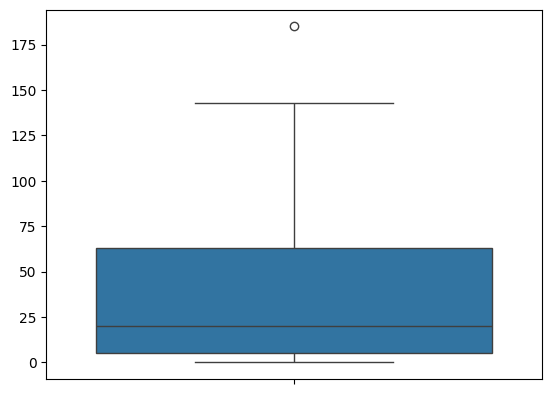

In [ ]:
n = 5
print(df_train.iloc[:, n].name)
sns.boxplot(df_train['critical_temp'].values)

In [6]:
# смотрим с ем коррелирует температура
temp_cor = df_train.corr()['critical_temp']

<ipython-input-6-63437df1c1ca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp_cor = df_train.corr()['critical_temp']


In [7]:
# оставляем индексы, которые соответствуют корреляции большей заданной
indexes = temp_cor[np.abs(temp_cor) > cor_value].index
indexes

Index(['number_of_elements', 'wtd_mean_atomic_mass', 'gmean_atomic_mass',
       'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'wtd_mean_fie',
       'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie',
       'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'wtd_mean_atomic_radius',
       'gmean_atomic_radius', 'wtd_gmean_atomic_radius',
       'entropy_atomic_radius', 'wtd_entropy_atomic_radius',
       'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius',
       'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density',
       'gmean_Density', 'wtd_gmean_Density', 'entropy_Density',
       'wtd_entropy_Density', 'range_Density', 'wtd_range_Density',
       'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'entropy_ElectronAffinity',
       'wtd_entropy_ElectronAffinity', 'range_ElectronAf

In [8]:
# создаем датафрейм на основе отобранных столбцов
data_train = df_train[indexes]
# data_train

In [9]:
# разделяем данные на признаки и значения

y = data_train['critical_temp']
x = data_train.drop(columns=['critical_temp'])

try:
    del x['material']
except:
    pass

In [10]:
# разделяем данные на для обучения и для прроверки обучения
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

In [11]:
# используем и обучаем модель
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [12]:
# предсказываем значения с помощью обученной модели и данных, не использованных в обучении
y_pred = model.predict(x_test)

In [13]:
# смотрим на результат предсказания
y_pred

array([ 71.4410043 ,  65.86695304, 119.42809826, ...,  -2.48681843,
       -32.37236313,  80.75874802])

In [14]:
# смотрим на температуру, которая должна была получиться
np.array(y_test)

array([ 86.2,  88.5, 106.9, ...,  13.9,   4. ,  89. ])

In [15]:
print(f'r2 = {r2_score(y_test, y_pred)}')
print(f'MSE = {(t := mean_squared_error(y_test, y_pred))}')
print(f'RRMSE = {np.sqrt(t / np.sum(pow(y_pred, 2))) * 100}%')

r2 = 0.7505241045698249
MSE = 306.3981398600586
RRMSE = 0.6517159177148354%


# Используем обученную модель на тестовых данных

In [16]:
new_ind = [i for i in np.array(indexes) if i != 'critical_temp']
x1 = df_test[new_ind]
try:
    del x1['material']
except:
    pass

In [17]:
model = LinearRegression()

model.fit(x, y)

temperature = model.predict(x1)

In [18]:
temperature

array([45.36390378, 27.17556691, 72.40348785, ..., -0.92727615,
       17.03338962, 17.03338962])

In [19]:
df_test['critical_temp'] = temperature

In [ ]:
df_test['critical_temp']

In [ ]:
# df_test['critical_temp'].to_csv('predict.csv', sep=';', index=False)